In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import binom, poisson, geom
from ipywidgets import interact, fixed
import functools
import warnings

warnings.simplefilter('ignore')

# フォントおよびフォントサイズ
rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0


# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

# #C4240E, # 赤色：アクセントカラー1
# #1C1C1C', # 黒色：アクセントカラー2

%matplotlib inline

# **離散分布の確認**

## **二項分布**

$
\begin{equation}
P(X=k)={}_nC_kp^k(1-p)^{n-k}
\end{equation}
$

$n$ : 試行回数  
$p$ : 成功確率

【確認事項】
- パラメーターによって分布の形状が変わる事を確認する
- 試行回数が多い時にガウス分布に近づくこと確認する。(連続分布の記事を参照)
- 分散がp(1-p)に従う、すなわち、p=0.5の時に最大になる事を確認する。


In [2]:
def binom_func(n,p):
    """二項分布を作成し、描画する関数

    Args:
        n (int): 試行回数
        p (float): 確率
    """
    k  = np.arange(0, n+1) # 確率変数の指定
    px = binom.pmf(k, n, p) # 二項分布の確率作成

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,1)
    ax.set_xlim(0,100)

    ax.plot(k, px, color="#1167A7", marker="")
    plt.show()

In [5]:
interact(binom_func, n=(1,110,10), p=(0,1,0.01) ) # ここを変更する

interactive(children=(IntSlider(value=51, description='n', max=110, min=1, step=10), FloatSlider(value=0.0, de…

<function __main__.binom_func(n, p)>

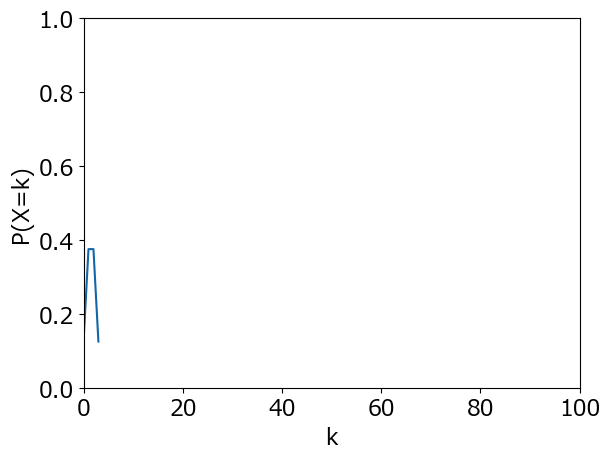

In [6]:
##-- 変更する変数 --##
n = 3
p = 0.5
##------------------##

binom_func(n,p)

## **ポアソン分布**



$
\begin{equation}
  P(X=k) = e^{-\lambda}・\frac{\lambda^k}{k!}
\end{equation}
$

$\lambda$ : 期待値, 分散

【確認事項】
- パラメーターによってどのように分布の形状が変わるかを確認する
- 期待期が大きいほど分散が大きくなることを確認する。
- 期待値が多い時にガウス分布に近づくこと確認する。(連続分布の記事を参照)

※ upper はグラフの描画範囲を決めるもので、関数のパラメータでないことに注意

In [7]:
def poisson_func(  lambda_, upper=10):
    """ポアソン分布を作成し、描画する関数

    Args:
        lambda_ (float): パラメータλ
        upper (int, optional): 描画範囲. デフォルトは300.
    """
    k  = np.arange(0, upper) # 確率変数の指定
    px = poisson.pmf(k, lambda_) # ポアソン分布の確率作成

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,0.4)
    ax.set_xlim(0,upper)

    ax.plot(k, px, color="#1167A7", marker="")
    plt.show()

In [8]:
interact(poisson_func, lambda_=(1,10,1), upper=fixed(10) ) # ここを変更する

interactive(children=(IntSlider(value=5, description='lambda_', max=10, min=1), Output()), _dom_classes=('widg…

<function __main__.poisson_func(lambda_, upper=10)>

In [9]:
interact(poisson_func, lambda_=(1,300,1), upper=fixed(300))

interactive(children=(IntSlider(value=150, description='lambda_', max=300, min=1), Output()), _dom_classes=('w…

<function __main__.poisson_func(lambda_, upper=10)>

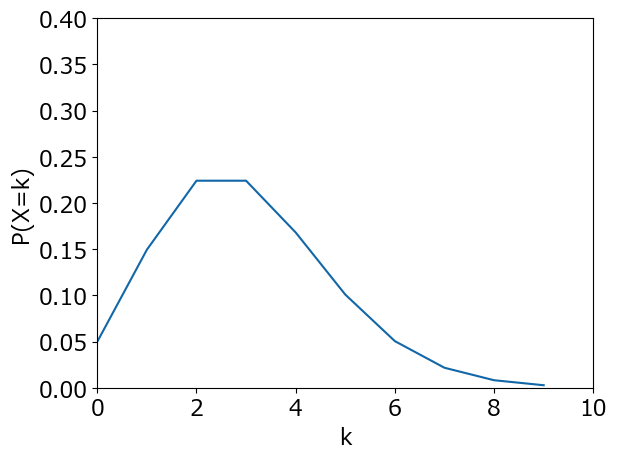

In [10]:
##-- 変更する変数 --##
lambda_ = 3
##------------------##

poisson_func(lambda_)

## **幾何分布**

$
\begin{equation}
  P(X=k)=(1-p)^{k-1}p
\end{equation}
$

$p$ : 1 試行ごとの成功確率


【確認事項】
- パラメーターによってどのように分布の形状が変わるかを確認する

In [11]:
def geom_func(p):
    """幾何分布を作成し、描画する関数

    Args:
        p (float): 確率
    """
    k  = np.arange(1, 50) # 確率変数の指定
    px = geom.pmf(k, p) # 幾何分布の確率作成

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,0.4)
    ax.set_xlim(0,50)   

    ax.plot(k, px, color="#1167A7", marker="")
    plt.show()

In [12]:
interact(geom_func, p=(0,1,0.05)) # ここを変更する

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.geom_func(p)>

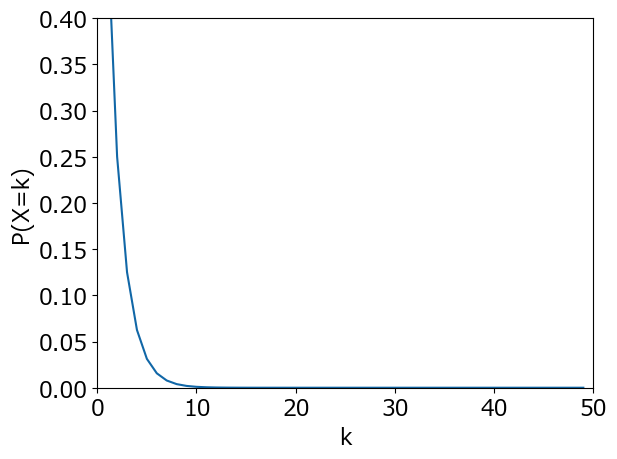

In [13]:
##-- 変更する変数 --##
p = 0.5
##------------------##

geom_func(p)